In [1]:
from keras.datasets import cifar10
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

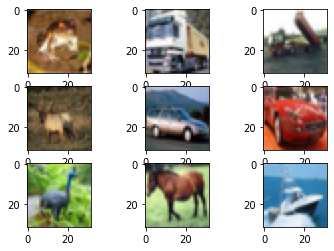

In [5]:
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i])
plt.show()

In [6]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


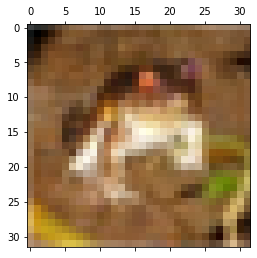

In [7]:
plt.matshow(X_train[0])
print(y_train[0])

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D,Activation
from keras.preprocessing.image import ImageDataGenerator

In [9]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(X_train, y_train, batch_size=64)

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape= X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

In [12]:
steps = int(X_train.shape[0] / 64)
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit_generator(it_train,steps_per_epoch=steps,epochs = 15,validation_data=(X_test,y_test))

Epoch 1/15
781/781 [==============================] - 24s 31ms/step - loss: 1.5821 - accuracy: 0.4179 - val_loss: 1.2506 - val_accuracy: 0.5514
Epoch 2/15
781/781 [==============================] - 23s 29ms/step - loss: 1.1461 - accuracy: 0.5933 - val_loss: 1.0862 - val_accuracy: 0.6253
Epoch 3/15
781/781 [==============================] - 23s 29ms/step - loss: 0.9529 - accuracy: 0.6646 - val_loss: 0.8591 - val_accuracy: 0.7105
Epoch 4/15
781/781 [==============================] - 22s 28ms/step - loss: 0.8397 - accuracy: 0.7064 - val_loss: 0.8937 - val_accuracy: 0.7015
Epoch 5/15
781/781 [==============================] - 22s 28ms/step - loss: 0.7556 - accuracy: 0.7363 - val_loss: 0.6985 - val_accuracy: 0.7615
Epoch 6/15
781/781 [==============================] - 22s 28ms/step - loss: 0.6934 - accuracy: 0.7604 - val_loss: 0.6854 - val_accuracy: 0.7694
Epoch 7/15
781/781 [==============================] - 22s 29ms/step - loss: 0.6512 - accuracy: 0.7728 - val_loss: 0.7129 - val_accuracy:

In [13]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 99us/step


[0.5545302278995514, 0.8166999816894531]

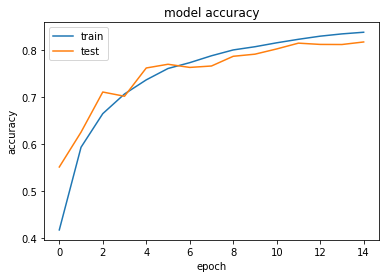

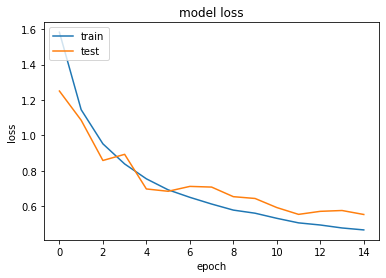

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()